# SD204   TP2
## Yuqing WANG

In [1]:
fn1 = "Yuqing"
ln1 = "WANG"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab1", ln1, fn1])) + ".ipynb"

# Exercise 1 Linear algebra
## (1.a) check it for n = 100 and p = 2000

In [2]:
import numpy as np
n = 100
p = 2000
X = np.random.normal(0,5,[n,p])
y = np.random.uniform(-1,1,[n,1])
lam = 1e-5
Idn = lam*np.identity(n)
Idp = lam*np.identity(p)
Xt = X.T
M1 = np.linalg.solve(np.dot(X,Xt)+Idn, y)
M2 = np.linalg.solve(np.dot(Xt,X)+Idp, Xt)
np.allclose(np.dot(Xt,M1),np.dot(M2,y), atol = 1e-5)

True

## (1.b)check it for n = 2000 and p = 100

In [3]:
n = 2000
p = 100
X = np.random.normal(0,5,[n,p])
y = np.random.uniform(-1,1,[n,1])
lam = 1e-5
Idn = lam * np.identity(n)
Idp = lam * np.identity(p)
Xt = X.T
M1 = np.linalg.solve(np.dot(X,Xt)+Idn, y)
M2 = np.linalg.solve(np.dot(Xt,X)+Idp, Xt)
np.allclose(np.dot(Xt,M1), np.dot(M2,y), atol = 1e-5)

True

## (2)  Propose a numerical/graphical study to compare when it is more time efficient

In [4]:
import time as time
def compute_time_different(n,p):
    X = np.random.normal(0,5,[n,p])
    y = np.random.uniform(-1,1,[n,1])
    lam = 1e-5
    Idn = lam * np.identity(n)
    Idp = lam * np.identity(p)
    Xt = X.T
    #left part
    start = time.time()
    left = np.dot(Xt,np.linalg.solve(np.dot(X,Xt)+Idn, y))
    end = time.time()
    time_left =  end - start
    #right part
    start = time.time()
    right = np.dot(np.linalg.solve(np.dot(Xt,X)+Idp, Xt), y)
    end = time.time()
    time_right = end - start
    #time difference
    return time_left - time_right

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = Axes3D(figure)
n = np.arange(200,2200,200)
p = np.arange(2000,0,-200)
time_difference = []
for n1 in n:
    for p1 in p:
        time_difference.append(compute_time_different(n1,p1))
n, p = np.meshgrid(n,p)
time_difference = np.reshape(time_difference,(10,10))

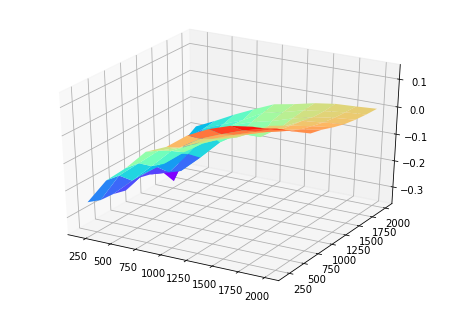

In [6]:
ax.plot_surface(n, p, time_difference, rstride=1, cstride=1, cmap='rainbow')
plt.show()

The red part means the time_difference is bigger than 0, which means the left part takes more time to caculate than the right part, it happens when n is much bigger than p. On the contrary, when p is bigger than n, the right part takes more time than the left part. 

# Exercise 2 Random matrix spectrum
## (3) Choose three non-Gaussian probability distributions and write a function that to n and p create a matrix  according to each distribution.

In [7]:
import math
def generate_three_distribution(n,p):
    X_uni = np.random.uniform(-math.sqrt(6), math.sqrt(6), [n,p])
    X_poi = np.random.poisson(2, [n,p]) - 2
    X_lap = np.random.laplace(0, 1, [n,p])
    return X_uni, X_poi, X_lap 

## （4） Display on one single graph the singular value of X for n = 1000, and p = 200; 500; 1000; 2000 for the three distribution chosen.

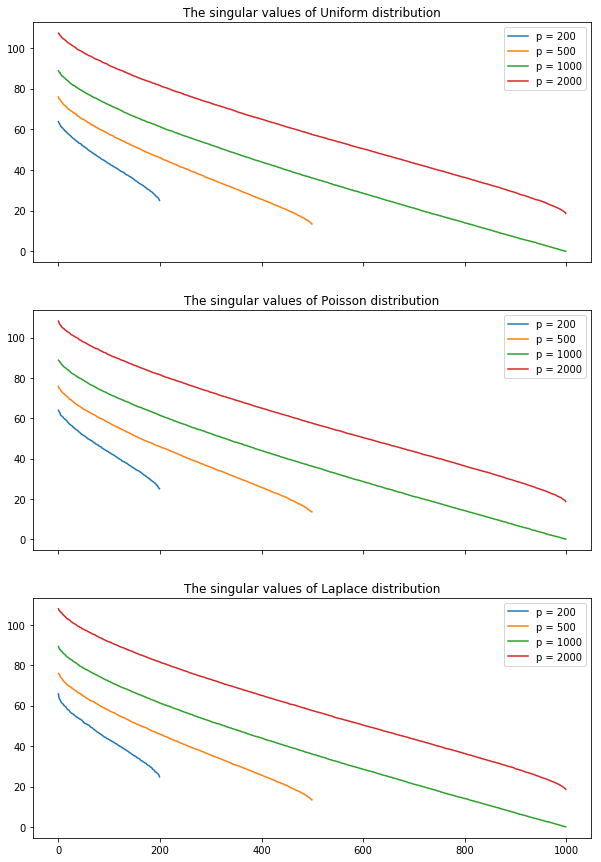

In [8]:
n = 1000
p = [200, 500, 1000, 2000]
fig, axes = plt.subplots(3, 1, sharex = True, figsize = (10,15))
for p1 in p:
    X_uni, X_poi, X_lap = generate_three_distribution(n,p1)
    u, s, vh =  np.linalg.svd(X_uni)
    axes[0].plot(s, label = "p = " + str(p1))
    u, s, vh =  np.linalg.svd(X_poi)
    axes[1].plot(s, label = "p = " + str(p1))
    u, s, vh =  np.linalg.svd(X_lap)
    axes[2].plot(s, label = "p = " + str(p1))
axes[0].set_title("The singular values of Uniform distribution")
axes[0].legend(loc = 'upper right')
axes[1].set_title("The singular values of Poisson distribution")
axes[1].legend(loc = 'upper right')
axes[2].set_title("The singular values of Laplace distribution")
axes[2].legend(loc = 'upper right')
plt.show()

## (5) Display on one single graph the spectrum of XTX/n for n = 1000, and p = 200; 500; 1000; 2000

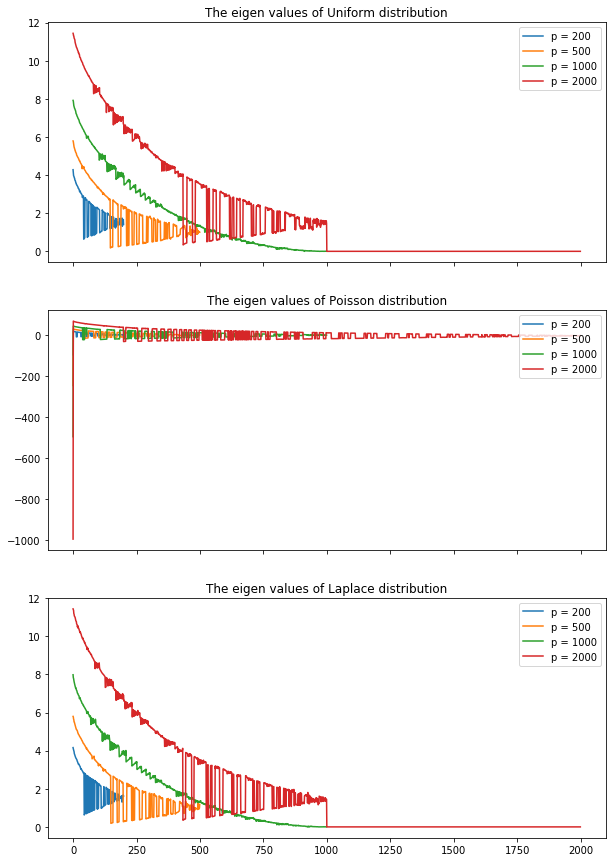

In [9]:
import warnings
warnings.filterwarnings("ignore")
n = 1000
p = [200, 500, 1000, 2000]
fig, axes = plt.subplots(3, 1, sharex = True, figsize = (10,15))
for p1 in p:
    X_uni, X_poi, X_lap = generate_three_distribution(n,p1)
    w,v =  np.linalg.eig(np.dot(X_uni.T, X_uni)/n)
    axes[0].plot(w, label = "p = " + str(p1))
    w,v =  np.linalg.eig(np.dot(X_poi.T, X_poi)/n)
    axes[1].plot(w, label = "p = " + str(p1))
    w,v =  np.linalg.eig(np.dot(X_lap.T, X_lap)/n)
    axes[2].plot(w, label = "p = " + str(p1))
axes[0].set_title("The eigen values of Uniform distribution")
axes[0].legend(loc = 'upper right')
axes[1].set_title("The eigen values of Poisson distribution")
axes[1].legend(loc = 'upper right')
axes[2].set_title("The eigen values of Laplace distribution")
axes[2].legend(loc = 'upper right')
plt.show()

# Exercise 3 (Power method)
## (6) Write a function coding the following algorithm 1

In [10]:
def power_method(X, n_iter, u, v, u0, v0):
    u_difference = []
    v_difference = []
    for i in range(0, n_iter+1):
        u = np.dot(X,v)
        v = np.dot(X.T,u)
        u = u/(np.linalg.norm(u))
        v = v/(np.linalg.norm(v))
        if (np.inner(u.T,u0.T) < 0):
            u_difference.append(np.linalg.norm(u+u0))
        else:
            u_difference.append(np.linalg.norm(u-u0))
        if (np.inner(v.T,v0.T) < 0):
            v_difference.append(np.linalg.norm(v+v0))
        else:
            v_difference.append(np.linalg.norm(v-v0))
    return u, v, u_difference, v_difference

## (7) Illustrate visually (with a graph) a case where the algorithm converges

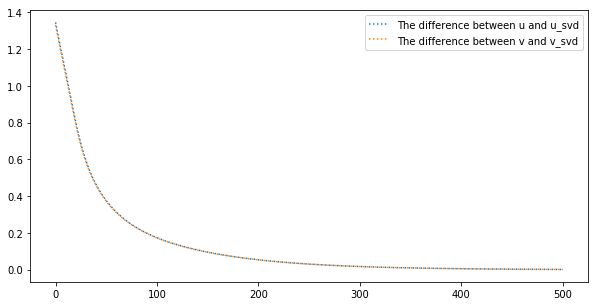

In [11]:
n = 100
p = 2000
n_iter = 500
X = np.random.normal(0,5,[p,n])
u = np.random.randn(p,1)
v = np.random.randn(n,1)
u_svd, s, v_svd =  np.linalg.svd(X, compute_uv = True)
u0 = u_svd.T[0].reshape((p,1))
v0 = v_svd[0].reshape((n,1))
u, v, u_difference, v_difference = power_method(X, n_iter, u, v, u0, v0)
fig, axes = plt.subplots(1, 1, sharex = True, figsize = (10,5))
axes.plot(u_difference, ':', label = "The difference between u and u_svd")
axes.plot(v_difference, ':', label = "The difference between v and v_svd")
axes.legend(loc = 'upper right')
plt.show()

We can see that the algorithm converges to the larges singular values of X

## （8） Provide two sets of initialization vectors leading to different limits for this algorithm

In [12]:
def power_method_1(X, n_iter, u, v, u0, v0):
    u_difference = []
    v_difference = []
    for i in range(0, n_iter+1):
        u = np.dot(X, v)
        v = np.dot(X.T, u)
        u = u/(np.linalg.norm(u))
        v = v/(np.linalg.norm(v))
        u_difference.append(np.linalg.norm(u-u0))
        v_difference.append(np.linalg.norm(v-v0))
    return u, v, u_difference, v_difference

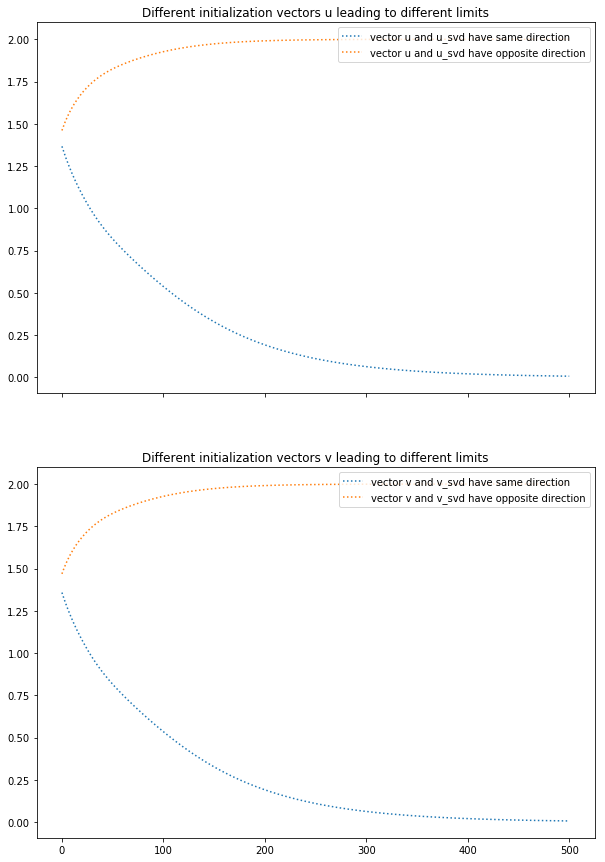

In [13]:
n = 100
p = 2000
n_iter = 500
X = np.random.normal(0,5,[p,n])
u = np.random.randn(p,1)
v = np.random.randn(n,1)
u_svd, s, v_svd =  np.linalg.svd(X, compute_uv = True)
u0 = u_svd.T[0].reshape((p,1))
v0 = v_svd[0].reshape((n,1))
if (np.inner(u.T, u0.T) < 0):
    u = -u
    u1 = -u
else:
    u1 = -u
if (np.inner(v.T, v0.T) < 0):
    v = -v
    v1 = -v
else:
    v1 = -v
u, v, u_difference, v_difference = power_method_1(X, n_iter, u, v, u0, v0)
u1, v1, u_difference_1, v_difference_1 = power_method_1(X, n_iter, u1, v1, u0, v0)
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (10,15))
axes[0].plot(u_difference, ':',  label = "vector u and u_svd have same direction")
axes[0].plot(u_difference_1, ':',  label = "vector u and u_svd have opposite direction")
axes[1].plot(v_difference, ':',  label = "vector v and v_svd have same direction")
axes[1].plot(v_difference_1, ':',  label = "vector v and v_svd have opposite direction")
axes[0].legend(loc = 'upper right')
axes[1].legend(loc = 'upper right')
axes[0].set_title("Different initialization vectors u leading to different limits")
axes[1].set_title("Different initialization vectors v leading to different limits")
plt.show()

The difference between u, v and u_svd, v_svd depends on the relative direction, so the result of this algorithm would converge to 0 or 2.

## (9) Provide a way to approximate the largest singular value of X using the power method

In [14]:
def largest_singular_value(X):
    n_iter = 1000
    u = np.random.randn(p, 1)
    v = np.random.randn(n, 1)
    for i in range(0, n_iter+1):
        u = np.dot(X, v)
        v = np.dot(X.T, u)
        u = u/(np.linalg.norm(u))
        v = v/(np.linalg.norm(v))
    u_svd, s, v_svd =  np.linalg.svd(X, compute_uv = True)
    u0 = u_svd.T[0].reshape((p, 1))
    v0 = v_svd[0].reshape((n, 1))
    if (np.inner(u.T, u0.T) < 0):
        u = -u
    if (np.inner(v.T, v0.T) < 0):
        v = -v
    return u, v

## (10) Build upon the power method to provide an algorithm that can approximate the second largest singular value of X

In [15]:
def second_largest_singular_value(X):
    u, v = largest_singular_value(X)    #first use of power method
    s = np.dot(np.dot(u.T, X),v)
    X = X - s * np.dot(u,v.T)
    u, v = largest_singular_value(X)    #seconde use of power method
    return u, v

In [16]:
n = 100
p = 2000
X = np.random.normal(0, 5, [p,n])
u1, v1 = largest_singular_value(X)
u2, v2 = second_largest_singular_value(X)
s1 =  np.dot(np.dot(u1.T,X), v1)
s2 =  np.dot(np.dot(u2.T,X), v2)
print("The largest singular value of X is %f" %s1)
print("The second largest singular value of X is %f" %s2)

The largest singular value of X is 274.173133
The second largest singular value of X is 269.924856


# Exercise 4 (PCA)
## (11) Import with Pandas the dataset defra_consumption.csv 

In [17]:
import pandas as pd
df = pd.read_csv('defra_consumption.csv', sep=";", index_col=0)
display(df)

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


## (12) Center and standard the dataset using the preprocessing module from sklearn

In [18]:
from sklearn import preprocessing
X = preprocessing.scale(df)

## (13) Display a scatter plot of the n points projected on the space generated by the first principal axes

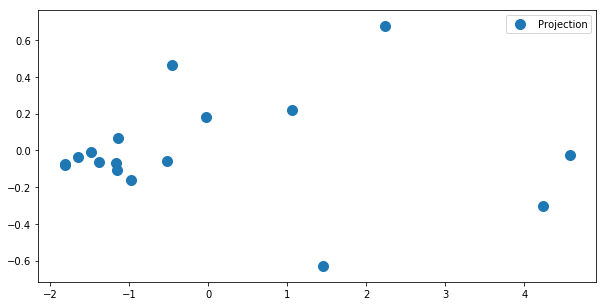

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
plt.figure(figsize = (10,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label="Projection", s=n)
plt.legend(loc='upper right')
plt.show()

## (14) Repeat the previous question for the space generated by three axes

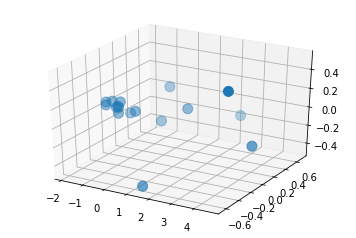

In [20]:
pca_3d = PCA(n_components = 3)
X_pca_3d = pca_3d.fit_transform(X)
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=n)
plt.show()

## (15) Compare the previous 2D and 3D graphs with the one obtained as follows :
## (a) Compute XTX, and diagonalize it. Project the n points encoded by X over the span of the eigen vectors associated to the two (respectively three) largest eigen values.

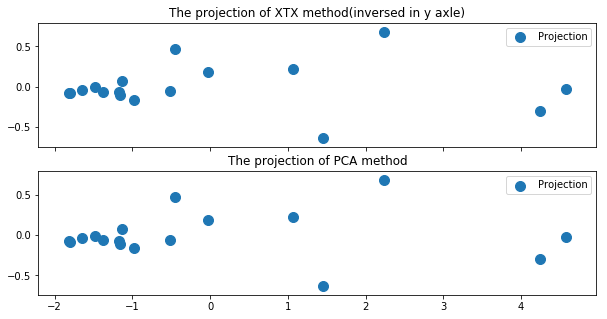

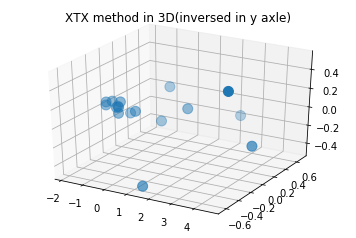

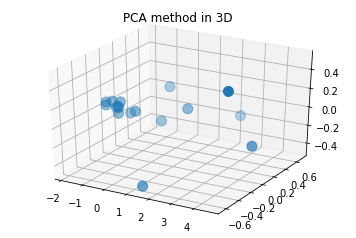

In [21]:
time_XTX_start = time.time()       #for question(15.c)
XtX = np.dot(X.T, X)
eig_val, eig_vec =  np.linalg.eig(XtX)
XtX_diag = np.dot(np.dot(np.linalg.inv(eig_vec), XtX), eig_vec)
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(X.shape[1])]
eig_pairs.sort(reverse=True)
#2D 
X_2d = np.array([ele[1] for ele in eig_pairs[:2]])
X_2d = np.dot(X, X_2d.T)
plt.figure()
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (10,5))
axes[0].scatter(X_2d[:,0], -X_2d[:,1], label="Projection", s=n)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], label="Projection", s=n)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title("The projection of XTX method(inversed in y axle)")
axes[1].set_title("The projection of PCA method")
plt.show()
#3D 
X_3d = np.array([ele[1] for ele in eig_pairs[:3]])
X_3d = np.dot(X, X_3d.T)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_3d[:,0], -X_3d[:,1], X_3d[:,2], s=n)
ax.set_title("XTX method in 3D(inversed in y axle)")
plt.show()
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=n)
ax.set_title("PCA method in 3D")
plt.show()
time_XTX_end = time.time()       #for question(15.c)

## (b) Compute the SVD of X. Project the n points encoded by X over the span of the left singular vectors associated to the two (respectively three) largest singular values

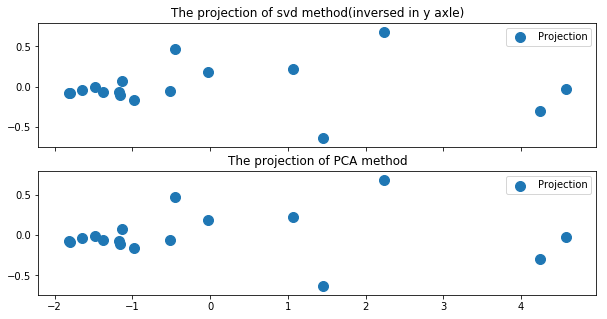

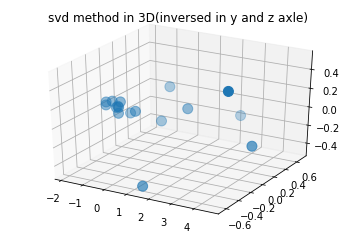

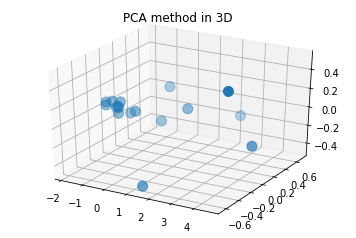

In [22]:
time_svd_start = time.time()       #for question(15.c)
u_svd, s, v_svd =  np.linalg.svd(X, full_matrices=1, compute_uv = True)
u_2d = np.array((u_svd.T[:2]).T)
s_2d = [[s[0], 0], [0, s[1]]]
X_svd = np.dot(u_2d, s_2d) 
#2D
plt.figure()
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (10,5))
axes[0].scatter(X_svd[:,0], -X_svd[:,1], label="Projection", s=n)  
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], label="Projection", s=n)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title("The projection of svd method(inversed in y axle)")
axes[1].set_title("The projection of PCA method")
plt.show()
#3D
U_3d = np.array((u_svd.T[:3]).T)
s_3d = [[s[0], 0, 0], [0, s[1], 0], [0, 0, s[2]]]
X_svd = np.dot(U_3d,s_3d)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_svd[:,0], -X_svd[:,1], -X_svd[:,2], s=n)
ax.set_title("svd method in 3D(inversed in y and z axle)")
plt.show()
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=n)
ax.set_title("PCA method in 3D")
plt.show()
time_svd_end = time.time()       #for question(15.c)

## (c) Evaluate the difference in timing for the two methods

In [23]:
time_XTX = time_XTX_end - time_XTX_start
time_svd = time_svd_end - time_svd_start
print("Time cost of XTX method: %f" %time_XTX)
print("Time cost of svd method: %f" %time_svd)

Time cost of XTX method: 0.610000
Time cost of svd method: 0.567000


SVD method costs less time than the XTX method

# Exercise 5 Logistic regression for face classification
## (16) Describe precisely what are the features in this dataset. How many features are available ?

In [24]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


n_samples means the number of the images in this dataset  
n_features means the number of proper vector that each people provides (the dimension of proper vector)  
n_classes means the number of people

## (17 a) perform a PCA step with an explained variance (or inertia) percentage of 95% to transform the original dataset, before performing a logistic regression step

In [25]:
from sklearn.linear_model.logistic import LogisticRegression
X = preprocessing.scale(X)
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_[1]
n = X_pca.shape[1] * explained_variance * 0.95
print ("The number of principal axis is : %f" % int(n))
pca = PCA(n_components = int(n))
X_pca = pca.fit_transform(X)
logistic = LogisticRegression()
logistic.fit(X_pca,y)
scores=logistic.score(X_pca,y)
print ("The accurary is : %f" % scores)

The number of principal axis is : 191.000000
The accurary is : 0.989907


## (b) use cross-validation to select the number of principal axis in a procedure performing a PCA followed by a logistic regression step

In [26]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
num_axle = 0
score_cv = 0
for n in  np.arange(10,410,10):
    X_pca_test = X_pca[:, :n]
    X_train, X_test, y_train, y_test = train_test_split(X_pca_test, y, test_size=0.4, random_state=0)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
    X_test_transformed = scaler.transform(X_test)
    clf.score(X_test_transformed, y_test) 
    clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
    score = cross_val_score(clf, X_pca_test, y, scoring='accuracy')[0]
    if score > score_cv:
        score_cv = score
        num_axle = n
print ("The number of principal axis is : %f" % num_axle)
pca = PCA(n_components = int(num_axle))
X_pca = pca.fit_transform(X)
logistic = LogisticRegression()
logistic.fit(X_pca,y)
scores=logistic.score(X_pca,y)
print ("The accurary is : %f" % scores)

C:\Users\wangy\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The number of principal axis is : 50.000000
The accurary is : 0.875776
